In [210]:
import numpy as np
import util


class Kotlarski():
    def __init__(self, Y1, Y2, loc=0, T=0.5):
        self.Y1 = Y1
        self.Y2 = Y2
        self.loc = 0
        self.T = T
        
    def ecf(self, t1, t2):
        return np.mean(np.exp(1j*t1*self.Y1 + 1j*t2*self.Y2))

    def d1ecf(self, t1, t2):
        return np.mean(1j*Y1 * np.exp(1j*t1*self.Y1 + 1j*t2*self.Y2))

    def deconvolution(self):
        integrand = lambda u: self.d1ecf(0,u) / self.ecf(0,u)
        def phi_x(t):
            if t>=0:
                return np.exp(util.complex_quadrature(integrand, 0, t)[0] - 1j*t*self.loc)
            else:
                return np.exp(util.complex_quadrature(integrand, -t, 0)[0] - 1j*t*self.loc)
        # phi_x  = lambda t: np.exp(util.complex_quadrature(integrand, 0, t)[0] - 1j*t*self.loc)
        phi_e1 = lambda t: self.ecf(t,0)/phi_x(t)
        phi_e2 = lambda t: self.ecf(0,t)/phi_x(t)
        return (phi_x, phi_e1, phi_e2)

    def densities(self):
        def integrand(func, t, u):
            return np.exp(-1j*t*u) * func(t)

        def density(func, t):
            return 1/(2*np.pi) * util.complex_quadrature(lambda u : integrand(func, t, u), -self.T, self.T)[0]
            
        lst = []
        for func in self.deconvolution():
            lst.append(lambda t: density(func, t))
        
        return lst

    def fx(self, x):
        return self.densities()[0](x)

    def fe1(self, x):
        return self.densities()[1](x)

    def fe2(self, x):
        return self.densities()[2](x)

        
    



In [211]:
import numpy as np
#import quadpy

X = np.random.normal(size=100)
e1 = np.random.normal(loc=2, size=100)
e2 = np.random.normal(loc=2, size=100)
Y1 = X + e1
Y2 = X + e2

In [212]:
kot = Kotlarski(Y1, Y2)

kot.fe1(2)

(0.07993263163557764-0.08034199956580348j)

/Users/xy38/opt/anaconda3/envs/salvage-car/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


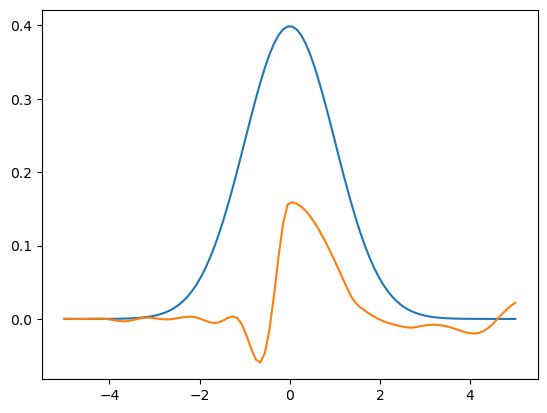

In [209]:
import matplotlib.pyplot as plt

x_plot = np.linspace(-5,5,100)
plt.plot(x_plot, scipy.stats.norm.pdf(x_plot))

est_plot = []
for x in x_plot:
    est_plot.append(kot.fx(x))
plt.plot(x_plot, est_plot)

In [171]:
est_plot

[(0.030704828823545128+0.016021548278514777j),
 (0.022761735950060785+0.0065652980776934235j),
 (0.011264453235244932+0.0009110041282071285j),
 (-0.002074692486572438+0.00024893734192915986j),
 (-0.01517315296224379+0.005020342221161068j),
 (-0.025896098975186476+0.014814991807258801j),
 (-0.032396194858109864+0.028400057025112047j),
 (-0.03342233696189607+0.043881222168613475j),
 (-0.02854720264141584+0.05897621612783344j),
 (-0.018274120166886485+0.07136244175997733j),
 (-0.004001027900337968+0.07904713292928053j),
 (0.0121592782720886+0.08070270878974223j),
 (0.02768096118904796+0.0759129141813174j),
 (0.04000733555257842+0.06528682813052425j),
 (0.04695731056387175+0.050416462932386934j),
 (0.04709356330218562+0.033676887838993134j),
 (0.039992896404422176+0.01789221966139124j),
 (0.026371506626354915+0.005912739916061988j),
 (0.008037984151779183+0.00016437173426871914j),
 (-0.01232794911319254+0.0022390927895188954j),
 (-0.031546274325755505+0.012592085463872282j),
 (-0.046408196

In [89]:
a = 1
b = 2
g(1)

4